# Towards Data Science Article:
## Visualizaing Data with Seaborn: Who Pays More for Health Insurance?

#### Article By: Jaosn Chong


### Import the required libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load the data set

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Visualising Feature Distribution

#### categorical variables:
- sns.countplot
- sns.catplot

#### numerical variables:
- sns.boxplot
- sns.distplot
- sns.kdeplot

Text(0.5, 1.0, 'Sex Value Counts')

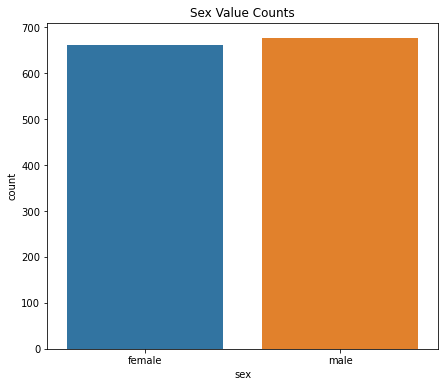

In [14]:
# Looking at 'sex' distribution

plt.figure(figsize = (7, 6))
sns.countplot(df['sex'])
plt.title('Sex Value Counts')

Text(0.5, 1.0, 'Smoker Value Counts')

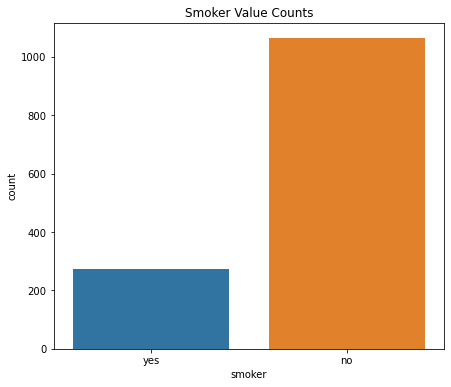

In [15]:
# Looking at the 'smoker' column distribution

plt.figure(figsize = (7, 6))
sns.countplot(df['smoker'])
plt.title('Smoker Value Counts')

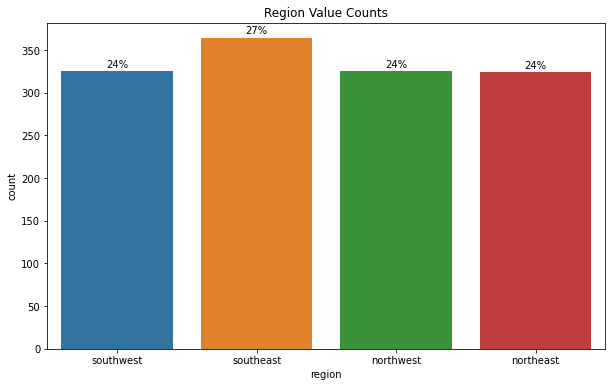

In [16]:
# Looking at 'region' column

total = len(df)
plt.figure(figsize = (10, 6))
plt.title('Region Value Counts')
ax = sns.countplot(x = 'region', data = df)
for p in ax.patches:
    percentage = '{0:.0f}%'.format(p.get_height() / total * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha = 'center')
plt.show()

In [17]:

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### sns.catplot

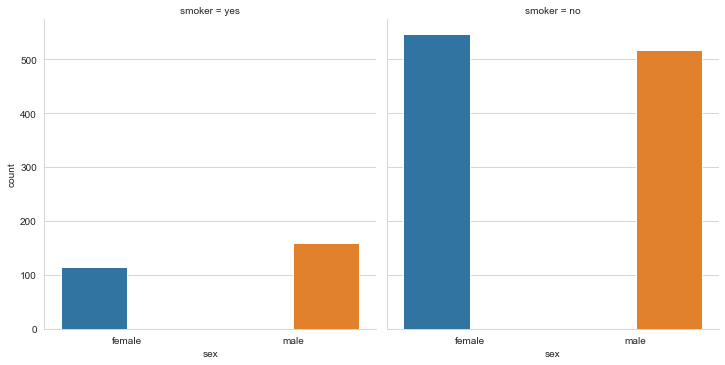

In [19]:
sns.set_style("whitegrid")
sns.catplot('sex', col = 'smoker', hue = 'sex', data = df, kind = 'count')

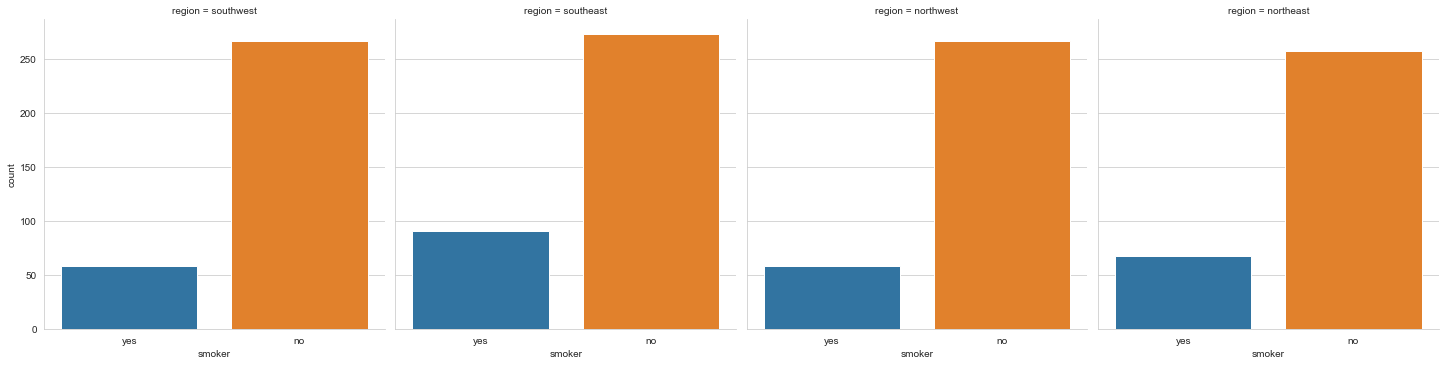

In [21]:
sns.set_style("whitegrid")
sns.catplot(x = 'smoker', col = 'region', data = df, kind = 'count')

### Numerical variables

In [23]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Text(0.5, 1.0, 'Charges by Smoking Habits')

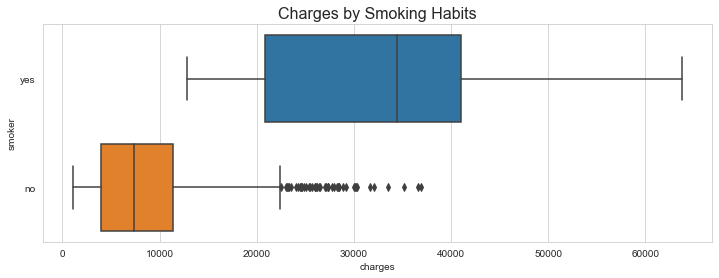

In [29]:
#style must be one of white, dark, whitegrid, darkgrid, ticks
sns.set_style('whitegrid')
plt.figure(figsize=(12, 4))
sns.boxplot(y = df.smoker, x = df.charges)
plt.title("Charges by Smoking Habits", fontsize=16)

Text(0.5, 1.0, 'Chages by Sex')

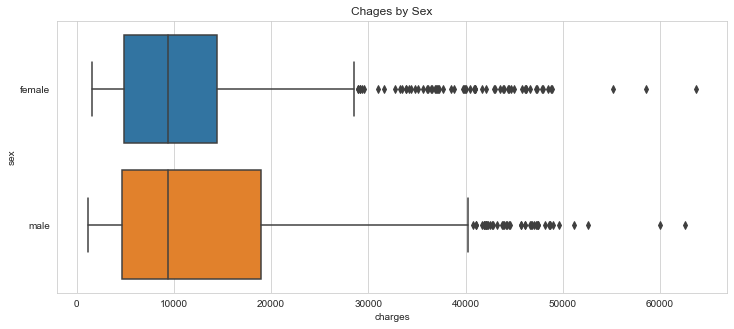

In [30]:
plt.figure(figsize=(12, 5))
sns.boxplot(y = df.sex, x = df.charges)
plt.title("Chages by Sex")

### sns.distplot

Text(0.5, 1.0, 'BMI Distribution')

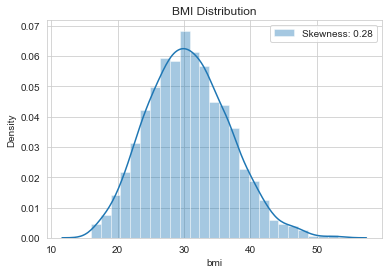

In [31]:
sns.set_style("whitegrid")
sns.distplot(df.bmi, label = "Skewness: %.2f"%(df.bmi.skew()))
plt.legend(loc = 'best')
plt.title("BMI Distribution")

In [33]:
print("Average BMI: {:.2f}".format(df['bmi'].mean()))

Average BMI: 30.66


### sns.kdeplot

- kernel distribution estimation is a non-parametric way to estimate probability density functio of a continuous random variable

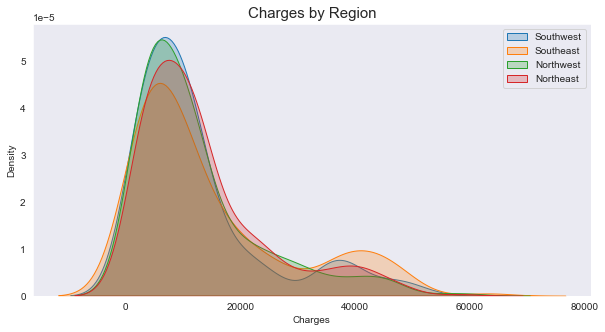

In [45]:
plt.figure(figsize = (10, 5))
sns.set_style("dark")
sns.kdeplot(df.loc[df.region == 'southwest', 'charges'], label = 'Southwest', shade = True)
sns.kdeplot(df.loc[df.region == 'southeast', 'charges'], label = 'Southeast', shade = True)
sns.kdeplot(df.loc[df.region == 'northwest', 'charges'], label = 'Northwest', shade = True)
sns.kdeplot(df.loc[df.region == 'northeast', 'charges'], label = 'Northeast', shade = True)
plt.xlabel("Charges")
plt.title("Charges by Region", fontsize=15)
plt.legend()
plt.show()

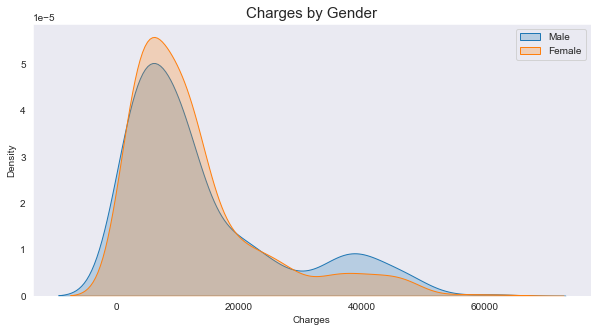

In [44]:
plt.figure(figsize = (10, 5))
sns.set_style("dark")
sns.kdeplot(df.loc[df.sex == 'male', 'charges'], label = 'Male', shade = True)
sns.kdeplot(df.loc[df.sex == 'female', 'charges'], label = 'Female', shade = True)
plt.xlabel("Charges")
plt.title("Charges by Gender", fontsize=15)
plt.legend()
plt.show()

## Visualize relationships

- sns.heatmap
- sns.barplot
- sns.jointplot
- sns.scatterplot
- sns.regplot
- sns.lmplot
- sns.swarmplot
- sns.violinplot
- sns.pointplot
- sns.pairplot

### sns.heatmap

Text(0.5, 1.0, 'Correlation Between Numerical Variables')

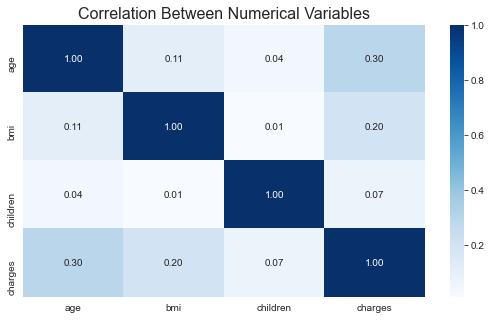

In [51]:
plt.figure(figsize=(9, 5))
correlation = df[['age', 'bmi', 'children', 'charges']].corr()
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'Blues')
plt.title('Correlation Between Numerical Variables', fontsize=16)

In [52]:
correlation['charges'].sort_values(ascending = False).drop('charges')

age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

### sns.barplot

Text(0.5, 1.0, 'Charges by Region')

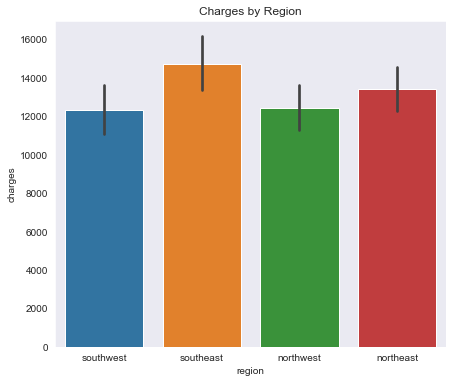

In [54]:
sns.set_style('dark')
plt.figure(figsize = (7, 6))
sns.barplot(x = 'region', y = 'charges', data = df)
plt.title('Charges by Region')

Text(0.5, 1.0, 'Charges by Dependent')

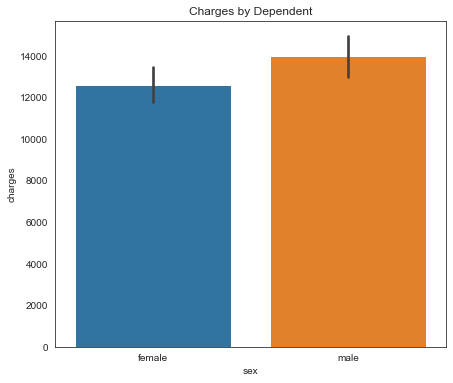

In [56]:
sns.set_style('white')
plt.figure(figsize = (7, 6))
sns.barplot(x = 'sex', y = 'charges', data = df)
plt.title('Charges by Dependent')

## sns.jointplot

- shows you where the data points lie between two different numerical variables

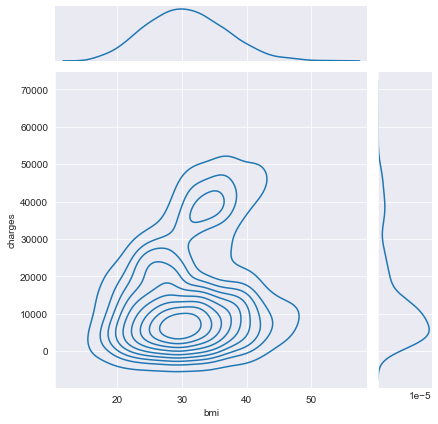

In [62]:
sns.set_style("darkgrid")
sns.jointplot(x = 'bmi', y = 'charges', data = df, kind = 'kde')

## sns.scatterplot


<AxesSubplot:xlabel='bmi', ylabel='charges'>

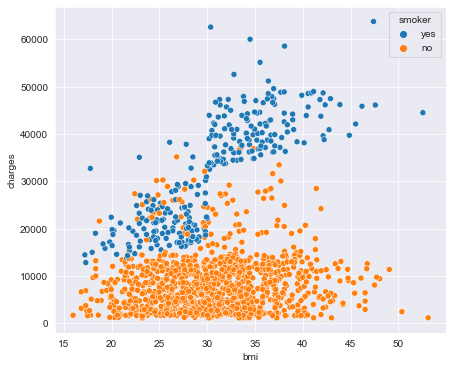

In [63]:
plt.figure(figsize = (7, 6))
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = df)

In [64]:
obese_smoker = df.loc[(df.bmi > 25) & (df['smoker'] == 'yes'), :]
obese_nonsmoker = df.loc[(df.bmi > 25 ) & (df['smoker'] == 'no'), :]

<AxesSubplot:xlabel='age', ylabel='charges'>

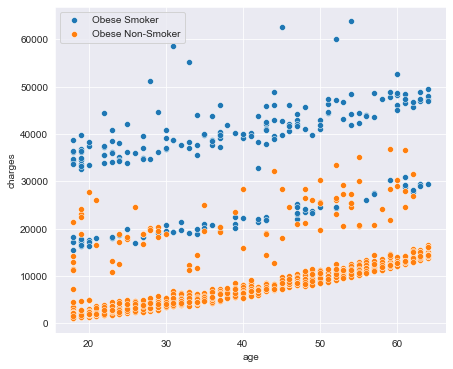

In [67]:
sns.set_style('darkgrid')
plt.figure(figsize = (7, 6))
sns.scatterplot(x = 'age', y = 'charges', data = obese_smoker, label = 'Obese Smoker')
sns.scatterplot(x = 'age', y = 'charges', data = obese_nonsmoker, label = 'Obese Non-Smoker')

## sns.regplot

- plols the data and adds a linear regression model fit

Text(0.5, 1.0, 'Charges Against BMI')

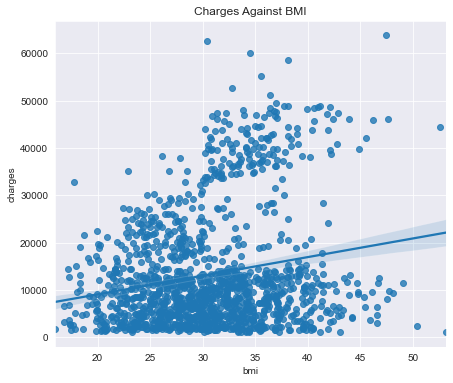

In [68]:
sns.set_style('darkgrid')
plt.figure(figsize = (7, 6))
sns.regplot(x = 'bmi', y = 'charges', data = df)
plt.title('Charges Against BMI')

## sns.lmplot

- Lmplot is similar to regplot but offers the ability to categorise the data points into different groups

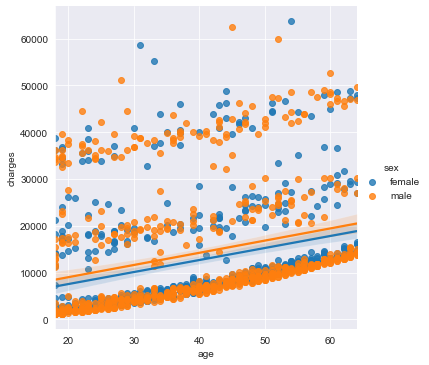

In [73]:
sns.set_style("darkgrid")
sns.lmplot(x = 'age', y = 'charges', hue = 'sex', data = df)

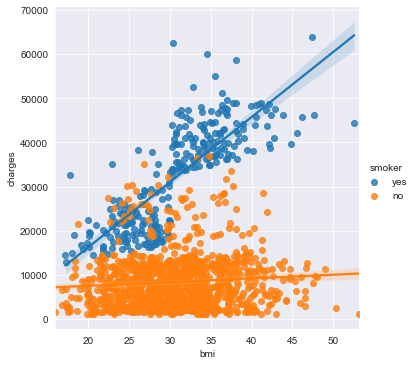

In [74]:
sns.lmplot(x = 'bmi', y = 'charges', hue = 'smoker', data = df)

## sns.swarmplot

- draws a categorical scatterplot with non-overlapping points

Text(0.5, 1.0, 'Charges by Smoking Habits')

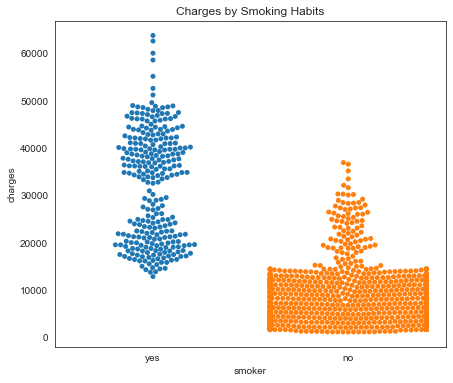

In [76]:
sns.set_style('white')
plt.figure(figsize = (7, 6))
sns.swarmplot(x = df['smoker'], y = df['charges'])
plt.title('Charges by Smoking Habits')



## sns.violinplot

- draws a combination of boxplot and kernel density estimate 

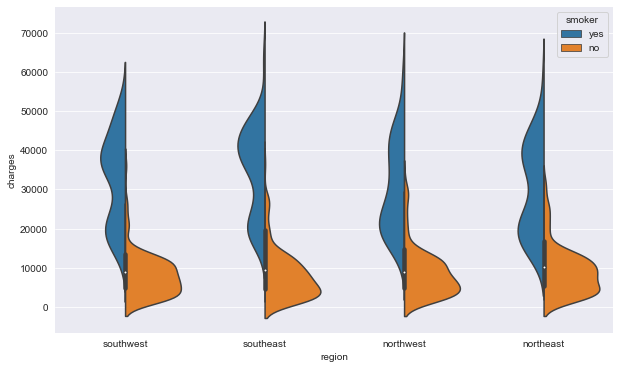

In [77]:

plt.figure(figsize = (10, 6))
sns.set_style('darkgrid')
sns.violinplot(x = 'region', y = 'charges', hue = 'smoker', data = df, split = True)
sns.despine(left = True)

## sns.pointplot

- Pointplot represents an estimate of central tendency for a numerical variable by the position of scatter plot points. 
- It also provides some indication of the uncertainty around that estimate using error bars.

<AxesSubplot:xlabel='region', ylabel='charges'>

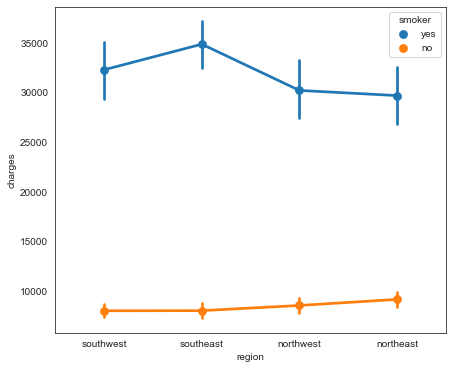

In [79]:
sns.set_style('white')
plt.figure(figsize = (7, 6))
sns.pointplot(x = 'region', y = 'charges', hue = 'smoker', data = df)

## sns.pairplot

- plots pairwise relationships between numerical variables in the dataset

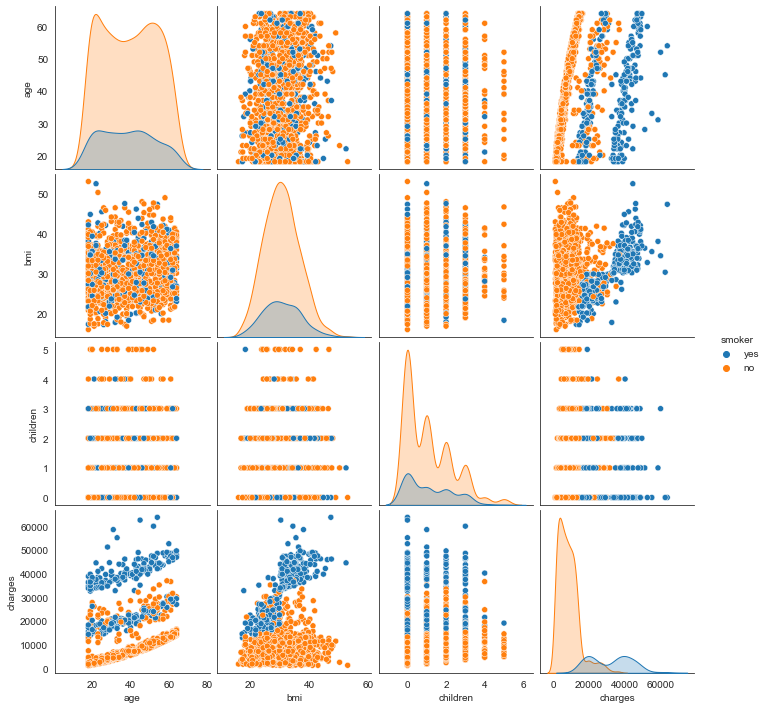

In [86]:
sns.pairplot(df, hue= 'smoker')
#plt.setp(plt.get_legend().get_texts(), fontsize='12') # for legend text
#plt.setp(plt.get_legend().get_title(), fontsize='14') # for legend title
